# Visión por Computadora 1

## Trabajo Práctico 1

In [3]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import pathlib

### **Parte 1 (imágenes en `/white_patch`)**

**1. Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación.** <br>

**2. Mostrar los resultados obtenidos y analizar las posibles fallas (si es que las hay) en el caso de White patch.**


In [2]:
def white_patch_correction(image, percentile=99):
    """
    Apply white patch color correction to the input image.

    Parameters:
    - image: Input image in RGB
    - percentile: Percentile value to determine the white point

    Returns:
    - Corrected image in RGB
    """
    
    # Convert image to float32 for precision
    img_float = image.astype(np.float32)

    # Calculate the percentile values for each channel
    r_max = np.percentile(img_float[:, :, 2], percentile)
    g_max = np.percentile(img_float[:, :, 1], percentile)
    b_max = np.percentile(img_float[:, :, 0], percentile)

    # Avoid division by zero
    r_max = r_max if r_max != 0 else 1.0
    g_max = g_max if g_max != 0 else 1.0
    b_max = b_max if b_max != 0 else 1.0

    # Calculate scaling factors
    r_scale = 255.0 / r_max
    g_scale = 255.0 / g_max
    b_scale = 255.0 / b_max

    # Apply scaling
    img_float[:, :, 2] *= r_scale
    img_float[:, :, 1] *= g_scale
    img_float[:, :, 0] *= b_scale

    # Clip values to [0, 255] and convert back to uint8
    corrected_image = np.clip(img_float, 0, 255).astype(np.uint8)

    return corrected_image

### test_blue.png

In [60]:
# Load test blue image
TEST_BLUE_PATH = pathlib.Path("material/white_patch/test_blue.png")
test_blue = cv.imread(str(TEST_BLUE_PATH), cv.IMREAD_COLOR_RGB)

if test_blue is not None:
    print(f"'{TEST_BLUE_PATH}' loaded ok\n")
    print(f"Shape:\n  x: {test_blue.shape[1]} px \n  y: {test_blue.shape[0]} px\n  channels: {test_blue.shape[2]}")

'material\white_patch\test_blue.png' loaded ok

Shape:
  x: 278 px 
  y: 100 px
  channels: 3


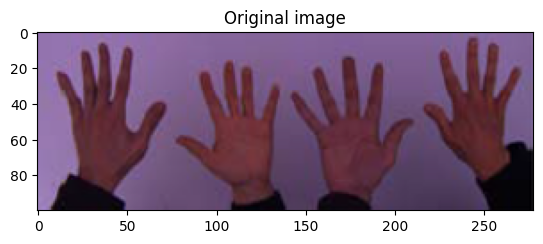

In [83]:
plt.title('Original image')
plt.imshow(test_blue)

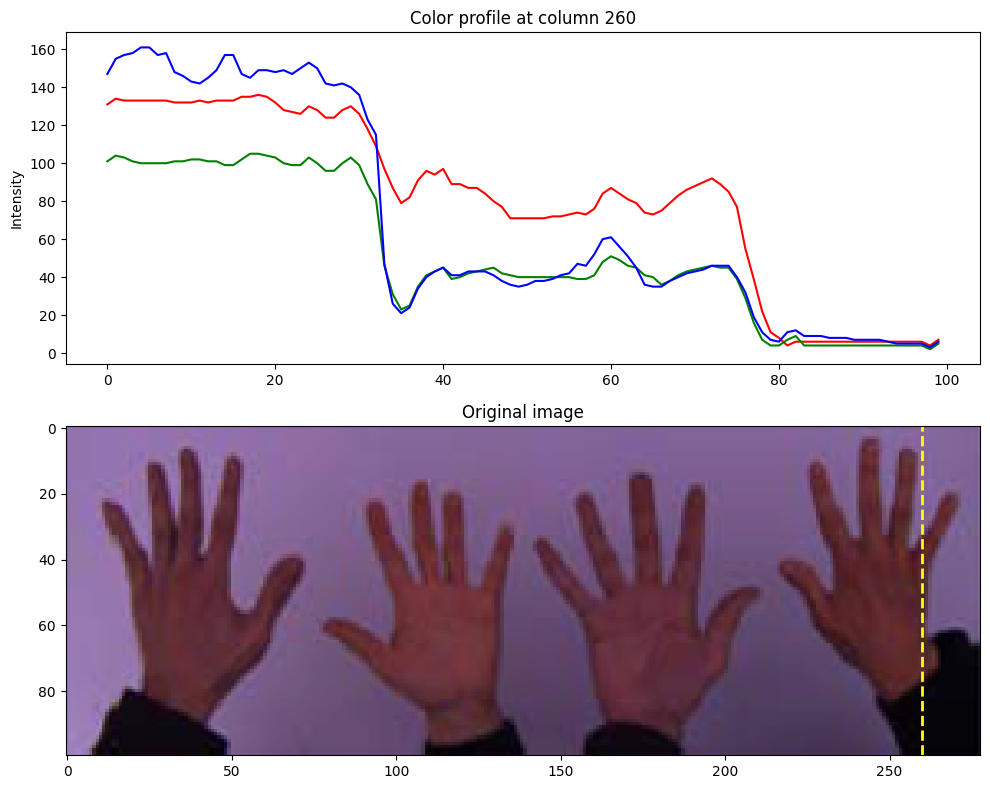

In [ ]:
COL = 260
profile_red = test_blue[:, COL, 0]  # Red channel
profile_green = test_blue[:, COL, 1]  # Green channel
profile_blue = test_blue[:, COL, 2]  # Blue channel

plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
plt.plot(profile_red, color='red')
plt.plot(profile_green, color='green')
plt.plot(profile_blue, color='blue')
plt.title('Color profile at column ' + str(COL))
plt.ylabel('Intensity')

plt.subplot(2, 1, 2)
plt.imshow(test_blue)
plt.axvline(x=COL, color='yellow', linestyle='--', linewidth=2)
plt.title('Original image')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Corrected Image (White Patch)')

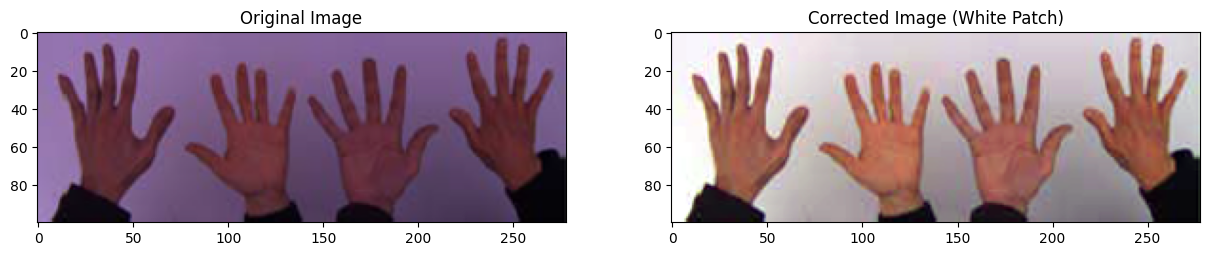

In [90]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.imshow(test_blue)
plt.title("Original Image")

corrected_img = white_patch_correction(test_blue, percentile=98)
plt.subplot(1, 2, 2)
plt.imshow(corrected_img)
plt.title("Corrected Image (White Patch)")


---

### **Parte 2**

**1. Para las imágenes `img1_tp.png` y `img2_tp.png`, leerlas con OpenCV en escala de grises y visualizarlas.** <br>

**2. Elija el número de bins que crea conveniente y grafique su histograma. Compare los histogramas entre sí. Explique lo que se observa, si tuviera que entrenar un modelo de clasificación/detección de imágenes, ¿considera que puede ser de utilidad tomar como 'features' los histogramas?**
